In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist

In [3]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [4]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [5]:
from keras.utils import np_utils 

Y_train=np_utils.to_categorical(y_train)      # 1-hot encoding
Y_test=np_utils.to_categorical(y_test) 

In [6]:
print(Y_train.shape)
print(Y_test.shape)

(60000, 10)
(10000, 10)


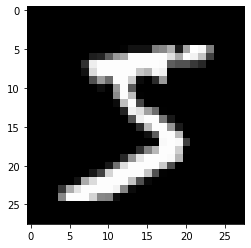

In [7]:
plt.imshow(X_train[0], cmap='gray')
plt.show()

Here.. we are working with black and white image..so channel ie dept is 1.... so reshape this to dimention 28,28,1 to denote as black and white image<br>
if it is colored image channel will be 3... R G B... here dimenstion will be 28 28 3


In [8]:
x_train=X_train.reshape(-1,28,28,1)
x_test=X_test.reshape(-1,28,28,1)

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [9]:
x_train=x_train[:3600]
x_test=x_test[:900]

Y_train=Y_train[:3600]
Y_test=Y_test[:900]

print(x_train.shape,Y_train.shape)
print(x_test.shape,Y_test.shape)

(3600, 28, 28, 1) (3600, 10)
(900, 28, 28, 1) (900, 10)


In [10]:
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout       
#Dense layer are fully connected layers where each nueron receives input from all neurons in previous layers
#Activation function applied on dense layer to activate non linear function
#Flatten is used to flatten matrix into an 1d array
#conv2D-To apply Convolutional layer
#MaxPool2D- to reduce size of image if no of weights increase too much
#Dropout-Used for reguralization of data
from keras.models import Sequential
#Sequential is simple layer where previous layer is fed into next layer |->|->|->|.....

In [11]:
model=Sequential()

#Dimentions- (28,28,1)
model.add(Conv2D(32, (3, 3),input_shape=(28,28,1)))   #32 filters, each filter 3x3
model.add(Activation('relu'))
#After conv layer- (26,26,32)

model.add(Conv2D(64, (3, 3)) )  #64 filters, each filter 3x3
model.add(Activation('relu'))
#After 2nd conv layer- (24,24,64)

model.add(MaxPooling2D(pool_size=(2,2)))
#reduces dimensions of image- (12,12,64)
#4 pixelels merged into 1, channels remains the same

model.add(Conv2D(16, (3, 3)) )  #16 filters, each filter 3x3
model.add(Activation('relu'))
#After 3nd conv layer- (10,10,16)

model.add(Flatten())   #After flattening.. total features will be 28*28=784
# (1600, )

model.add(Dropout(0.25))  #25% of random weights will be reduced to zero
#prevents over fitting

# model.add(Dense(100))
# model.add(Activation('relu'))
                                 #--> hidden layers optional
# model.add(Dense(100))         
# model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        9232      
_________________________________________________________________
activation_2 (Activation)    (None, 10, 10, 16)        0

1st conv layer- 3x3=9 weights+1 intercept term, and 32 filters..so 10*32= 320 params  <br>
2nd conv layer- (3x3=9 weights)*32channels for each filter=288*64 filters+64intercepts=18496  <br>
3rd conv layer- same calc as 2nd  <br>
Dense layer- 1600 features+1 intercept*10 neurons=16010

In [12]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [13]:
model.fit(x_train,Y_train, 
         batch_size=16,    #batch_size-how many training exaples to use before updating weights
         #nb_epoch=20,
         epochs=12,
         verbose=1,      #verbose- determines how detailed the output will be
         validation_data=(x_test,Y_test))

Epoch 1/12
225/225 [==============================] - 9s 37ms/step - loss: 2.1387 - accuracy: 0.4911 - val_loss: 0.3098 - val_accuracy: 0.8967
Epoch 2/12
225/225 [==============================] - 7s 32ms/step - loss: 0.2979 - accuracy: 0.9089 - val_loss: 0.2053 - val_accuracy: 0.9300
Epoch 3/12
225/225 [==============================] - 7s 32ms/step - loss: 0.1649 - accuracy: 0.9433 - val_loss: 0.2292 - val_accuracy: 0.9278
Epoch 4/12
225/225 [==============================] - 7s 32ms/step - loss: 0.1080 - accuracy: 0.9684 - val_loss: 0.1389 - val_accuracy: 0.9544
Epoch 5/12
225/225 [==============================] - 7s 32ms/step - loss: 0.0664 - accuracy: 0.9793 - val_loss: 0.1876 - val_accuracy: 0.9433
Epoch 6/12
225/225 [==============================] - 8s 33ms/step - loss: 0.0763 - accuracy: 0.9765 - val_loss: 0.1477 - val_accuracy: 0.9522
Epoch 7/12
225/225 [==============================] - 7s 32ms/step - loss: 0.0523 - accuracy: 0.9801 - val_loss: 0.1206 - val_accuracy: 0.9611